In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [3]:
data = pd.read_csv('../artifacts/ds.csv')

In [4]:
data.head()

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,I'm extremely disappointed with the lengthy an...
1,claim,0,negative,1,# Inefficient communication and lack of transp...
2,claim,0,negative,1,I recently had a terrible experience with the ...
3,claim,0,negative,1,##$ I am extremely dissatisfied with the vehic...
4,claim,0,negative,1,# Poor communication throughout the entire pro...


## Data Preprocessing

In [5]:
data.shape

(7585, 5)

#### remove duplicates

In [8]:
data.duplicated().sum()

np.int64(110)

In [9]:
duplicates = data[data.duplicated()]
print(duplicates)


     category (text)  category (binary) sentiment (text)  sentiment (binary)  \
38             claim                  0         negative                   1   
41             claim                  0         negative                   1   
497            claim                  0         negative                   1   
498            claim                  0         negative                   1   
572            claim                  0         negative                   1   
...              ...                ...              ...                 ...   
7266         service                  1         positive                   0   
7267         service                  1         positive                   0   
7268         service                  1         positive                   0   
7269         service                  1         positive                   0   
7463         service                  1         positive                   0   

                                       

In [10]:
data = data.drop_duplicates()
print(f"Dataset size after removing duplicates: {data.shape}")


Dataset size after removing duplicates: (7475, 5)


In [14]:
print(f"Remaining duplicates: {data.duplicated().sum()}")


Remaining duplicates: 0


#### checking null values

In [15]:
data.isnull().sum()

category (text)       0
category (binary)     0
sentiment (text)      0
sentiment (binary)    0
feedback              0
dtype: int64

### Text Preprocessing

##### convert upercase to lowercase

In [16]:
import re
import string

In [33]:
data["feedback"].head(5)

0    i'm extremely disappointed with the lengthy an...
1    # inefficient communication and lack of transp...
2    i recently had a terrible experience with the ...
3    ##$ i am extremely dissatisfied with the vehic...
4    # poor communication throughout the entire pro...
Name: feedback, dtype: object

In [34]:
data = data.copy()
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [35]:
data["feedback"].head()

0    i'm extremely disappointed with the lengthy an...
1    # inefficient communication and lack of transp...
2    i recently had a terrible experience with the ...
3    ##$ i am extremely dissatisfied with the vehic...
4    # poor communication throughout the entire pro...
Name: feedback, dtype: object

##### remove links

In [36]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [38]:
data["feedback"]

0       i'm extremely disappointed with the lengthy an...
1       # inefficient communication and lack of transp...
2       i recently had a terrible experience with the ...
3       ##$ i am extremely dissatisfied with the vehic...
4       # poor communication throughout the entire pro...
                              ...                        
7580    #### outstanding service from this vehicle ins...
7581    # excellent customer service at a vehicle insu...
7582    excellent service from the vehicle insurance c...
7583    # good service, excellent communication from i...
7584    ## outstanding customer service at triple aaa ...
Name: feedback, Length: 7475, dtype: object

##### remove punctuations

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["feedback"] = data["feedback"].apply(remove_punctuation)

In [41]:
data["feedback"].head(5)

0    im extremely disappointed with the lengthy and...
1     inefficient communication and lack of transpa...
2    i recently had a terrible experience with the ...
3     i am extremely dissatisfied with the vehicle ...
4     poor communication throughout the entire proc...
Name: feedback, dtype: object

##### remove numbers

In [55]:
data["feedback"].iloc[90]


'please investigate my claim asap communication has been poor throughout this process ive been waiting for 3 weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

In [58]:
data["feedback"] = data["feedback"].str.replace(r'\d+', '', regex=True)

In [59]:
data["feedback"].iloc[90]

'please investigate my claim asap communication has been poor throughout this process ive been waiting for  weeks and im still unsure about the status of my claim its unacceptable to keep customers in the dark about their claims the insurance company needs to improve its communication and claim processing time i demand a prompt response regarding the status of my claim this has been a terrible experience and im not satisfied with the service ive received so far'

##### remove stopwords

In [60]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [61]:
import nltk

##### downlad stopwords for english language

In [62]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [64]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [67]:
data["feedback"].head(5)

0    im extremely disappointed lengthy unsatisfacto...
1    inefficient communication lack transparency th...
2    recently terrible experience vehicle insurance...
3    extremely dissatisfied vehicle insurance claim...
4    poor communication throughout entire process u...
Name: feedback, dtype: object

##### stemming

In [68]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [69]:
data["feedback"] = data["feedback"].apply(lambda x: " ".join([ps.stem(x) for x in x.split()]))

In [72]:
data

,category (text),category (binary),sentiment (text),sentiment (binary),feedback
0,claim,0,negative,1,im extrem disappoint lengthi unsatisfactori ve...
1,claim,0,negative,1,ineffici commun lack transpar throughout claim...
2,claim,0,negative,1,recent terribl experi vehicl insur claim proce...
3,claim,0,negative,1,extrem dissatisfi vehicl insur claim process t...
4,claim,0,negative,1,poor commun throughout entir process unwilling...
...,...,...,...,...,...
7580,service,1,positive,0,outstand servic vehicl insur compani team extr...
7581,service,1,positive,0,excel custom servic vehicl insur compani repre...
7582,service,1,positive,0,excel servic vehicl insur compani repres highl...
7583,service,1,positive,0,good servic excel commun insur compani repres ...


## Vectorization

##### Bulidng Vocabulary

In [83]:
from collections import Counter
vocab=Counter()

In [84]:
vocab

Counter()

In [88]:
for sentence in data["feedback"]:
    vocab.update(sentence.split())

In [90]:
len(vocab)

3324

In [91]:
data.shape

(7475, 5)

In [120]:
vocab

Counter({'insur': 10729,
         'polici': 7885,
         'compani': 6140,
         'custom': 6014,
         'vehicl': 5923,
         'servic': 5898,
         'claim': 5817,
         'process': 5001,
         'experi': 3515,
         'term': 3476,
         'provid': 2989,
         'im': 2730,
         'commun': 2485,
         'make': 2422,
         'coverag': 2283,
         'recommend': 2256,
         'would': 2161,
         'respons': 2089,
         'team': 2086,
         'transpar': 2065,
         'time': 2065,
         'clear': 2023,
         'issu': 1941,
         'frustrat': 1934,
         'understand': 1873,
         'lack': 1869,
         'resolv': 1766,
         'expect': 1615,
         'help': 1602,
         'anyon': 1597,
         'repres': 1547,
         'extrem': 1527,
         'receiv': 1522,
         'profession': 1505,
         'effici': 1428,
         'need': 1393,
         'fair': 1392,
         'highli': 1382,
         'overal': 1381,
         'poor': 1378,
         

##### creating vocabulary

In [118]:
tokens=[key for key in vocab if vocab[key]>20]

In [119]:
len(tokens)

923

##### save vocabulary

In [121]:
def save_vocubulary(lines, filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocubulary(tokens,'../static/model/vocabulary.txt')

### Divide Dataset

In [126]:
X=data["feedback"]
Y=data["sentiment (binary)"]
Z=data["category (binary)"]

In [127]:
X

0       im extrem disappoint lengthi unsatisfactori ve...
1       ineffici commun lack transpar throughout claim...
2       recent terribl experi vehicl insur claim proce...
3       extrem dissatisfi vehicl insur claim process t...
4       poor commun throughout entir process unwilling...
                              ...                        
7580    outstand servic vehicl insur compani team extr...
7581    excel custom servic vehicl insur compani repre...
7582    excel servic vehicl insur compani repres highl...
7583    good servic excel commun insur compani repres ...
7584    outstand custom servic tripl aaa insur unparal...
Name: feedback, Length: 7475, dtype: object

In [128]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7580    0
7581    0
7582    0
7583    0
7584    0
Name: sentiment (binary), Length: 7475, dtype: int64

In [129]:
Z

0       0
1       0
2       0
3       0
4       0
       ..
7580    1
7581    1
7582    1
7583    1
7584    1
Name: category (binary), Length: 7475, dtype: int64

In [130]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.2)

In [139]:
X_train.shape

(5980,)

In [136]:
len(X_test)

1495

In [137]:
len(Y_train)

5980

In [138]:
len(Y_test)

1495

In [140]:
len(Z_train)

5980

In [141]:
len(Z_test)

1495

### Vectorization

In [142]:
def vectorizer(ds,vocabulary):
    vectorized_list=[]

    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1
        vectorized_list.append(sentence_list)

    vectorized_list_new=np.asarray(vectorized_list,dtype=np.float32)
    return vectorized_list_new
    

##### vextorized the training feedbacks

In [150]:
vectorized_X_train=vectorizer(X_train,tokens)

In [151]:
for i in vectorized_X_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [152]:
vectorized_X_train[0]

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

##### vectorize the test feedbacks

In [153]:
vectorized_X_test=vectorizer(X_test,tokens)

In [154]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [155]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [157]:
Y_train

4060     1
6375    10
3738     1
1475    10
4577     0
        ..
6865     0
6644    10
7509     0
479      1
2206     0
Name: sentiment (binary), Length: 5980, dtype: int64

In [158]:
Y_train.value_counts()

sentiment (binary)
1     2413
0     2035
10    1532
Name: count, dtype: int64

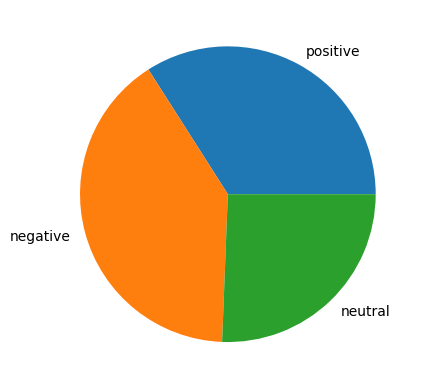

In [160]:
plt.pie(np.array([Y_train.value_counts()[0],Y_train.value_counts()[1],Y_train.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

In [161]:
Z_train.value_counts()

category (binary)
10    2057
1     2007
0     1916
Name: count, dtype: int64

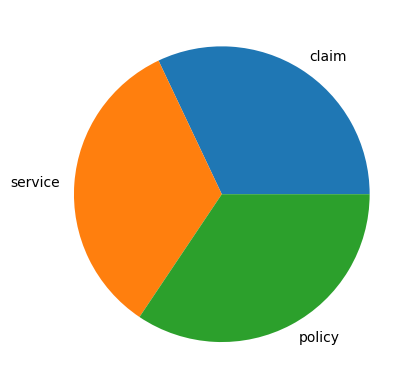

In [163]:
plt.pie(np.array([Z_train.value_counts()[0],Z_train.value_counts()[1],Z_train.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

### Handle imbalance dataset

In [164]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [173]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote,Y_train_smote=smote.fit_resample(vectorized_X_train,Y_train)
print(vectorized_X_train_smote.shape,Y_train_smote.shape)

(7239, 923) (7239,)


In [174]:
Y_train_smote.value_counts()

sentiment (binary)
1     2413
10    2413
0     2413
Name: count, dtype: int64

In [175]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_X_train_smote_category,Z_train_smote=smote.fit_resample(vectorized_X_train,Z_train)
print(vectorized_X_train_smote_category.shape,Z_train_smote.shape)

(6171, 923) (6171,)


In [177]:
Z_train_smote.value_counts()

category (binary)
10    2057
1     2057
0     2057
Name: count, dtype: int64

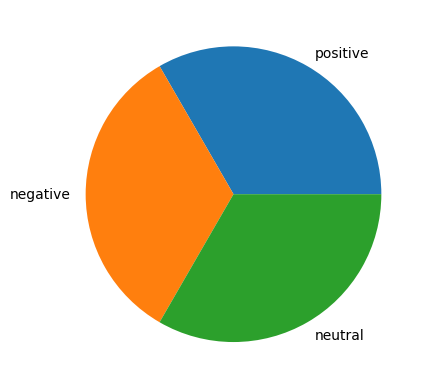

In [178]:
plt.pie(np.array([Y_train_smote.value_counts()[0],Y_train_smote.value_counts()[1],Y_train_smote.value_counts()[10]]),labels=['positive','negative','neutral'])
plt.show()

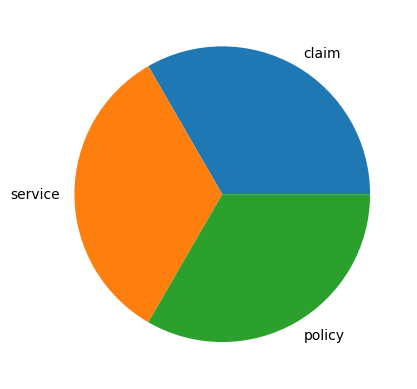

In [179]:
plt.pie(np.array([Z_train_smote.value_counts()[0],Z_train_smote.value_counts()[1],Z_train_smote.value_counts()[10]]),labels=['claim','service','policy'])
plt.show()

##### using this dataset for train & test the sentiment models

In [184]:
vectorized_X_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8224749 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68085086, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89727134, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [185]:
Y_train_smote

0        1
1       10
2        1
3       10
4        0
        ..
7234    10
7235    10
7236    10
7237    10
7238    10
Name: sentiment (binary), Length: 7239, dtype: int64

In [186]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [187]:
Y_test

2376     0
427      1
1864     0
6116    10
2414     0
        ..
3325     1
4488     0
3725     1
5957    10
1314    10
Name: sentiment (binary), Length: 1495, dtype: int64

##### using this dataset for train & test the models for categorization

In [188]:
vectorized_X_train_smote_category

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00787843, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59052753, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [189]:
Z_train_smote

0       10
1        1
2       10
3        0
4       10
        ..
6166     1
6167     1
6168     1
6169     1
6170     1
Name: category (binary), Length: 6171, dtype: int64

In [190]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [192]:
Z_test

2376     0
427      0
1864     0
6116     1
2414     0
        ..
3325    10
4488    10
3725    10
5957     1
1314     0
Name: category (binary), Length: 1495, dtype: int64

## Model Training & Evaluation 

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Model Training & Evaluation for Sentiment

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)  # Specify average
    
    print(f'Testing Scores:\n\tAccuracy: {acc}\n\tPrecision: {prec}\n\tRecall: {rec}\n\tF1-Score: {f1}\n')


##### logistic regression

In [202]:
lr=LogisticRegression()
lr.fit(vectorized_X_train_smote,Y_train_smote)

LogisticRegression()

In [203]:
Y_train_predict=lr.predict(vectorized_X_train_smote)

In [204]:
Y_train_predict

array([10, 10,  1, ..., 10, 10, 10])

In [205]:
Y_train_smote

0        1
1       10
2        1
3       10
4        0
        ..
7234    10
7235    10
7236    10
7237    10
7238    10
Name: sentiment (binary), Length: 7239, dtype: int64

In [206]:
training_scores(Y_train_smote,Y_train_predict)

Training Scores:
	Accuracy: 0.983
	Precision: 0.983
	Recall: 0.983
	F1-Score: 0.983



In [207]:
Y_test_predict=lr.predict(vectorized_X_test)

In [234]:
Y_test_predict

array([ 0,  1,  0, ..., 10, 10, 10])

In [235]:
Y_test

2376     0
427      1
1864     0
6116    10
2414     0
        ..
3325     1
4488     0
3725     1
5957    10
1314    10
Name: sentiment (binary), Length: 1495, dtype: int64

In [236]:
validation_scores(Y_test, Y_test_predict)

Testing Scores:
	Accuracy: 0.918
	Precision: 0.919
	Recall: 0.918
	F1-Score: 0.919



##### Naive Bayes

In [237]:
mnb=MultinomialNB()
mnb.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=mnb.predict(vectorized_X_train_smote)
Y_test_predict=mnb.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 0.911
	Precision: 0.914
	Recall: 0.911
	F1-Score: 0.911

Testing Scores:
	Accuracy: 0.895
	Precision: 0.901
	Recall: 0.895
	F1-Score: 0.895



##### Decision Tree

In [238]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=dt.predict(vectorized_X_train_smote)
Y_test_predict=dt.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.853
	Precision: 0.853
	Recall: 0.853
	F1-Score: 0.853



##### Random forest

In [239]:
rf=RandomForestClassifier()
rf.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=rf.predict(vectorized_X_train_smote)
Y_test_predict=rf.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.908
	Precision: 0.907
	Recall: 0.908
	F1-Score: 0.907



##### Support vector machine

In [240]:
svm=SVC()
svm.fit(vectorized_X_train_smote,Y_train_smote)
Y_train_predict=svm.predict(vectorized_X_train_smote)
Y_test_predict=svm.predict(vectorized_X_test)
training_scores(Y_train_smote,Y_train_predict)
validation_scores(Y_test, Y_test_predict)

Training Scores:
	Accuracy: 0.986
	Precision: 0.986
	Recall: 0.986
	F1-Score: 0.986

Testing Scores:
	Accuracy: 0.918
	Precision: 0.919
	Recall: 0.918
	F1-Score: 0.919



### saving the model

In [241]:
import pickle
with open ('../static/model/sentiment_model.pickle','wb') as file:
    pickle.dump(mnb,file)

### Model Training & Evaluation for Categorization

##### logistic regression

In [242]:
lrc=LogisticRegression()
lrc.fit(vectorized_X_train_smote_category,Z_train_smote)

LogisticRegression()

In [243]:
Z_train_predict=lrc.predict(vectorized_X_train_smote_category)

In [246]:
Z_train_predict

array([10,  1, 10, ...,  1,  1,  1])

In [247]:
Z_train_smote

0       10
1        1
2       10
3        0
4       10
        ..
6166     1
6167     1
6168     1
6169     1
6170     1
Name: category (binary), Length: 6171, dtype: int64

In [248]:
training_scores(Z_train_smote,Z_train_predict)

Training Scores:
	Accuracy: 0.998
	Precision: 0.998
	Recall: 0.998
	F1-Score: 0.998



In [252]:
Z_test_predict=lrc.predict(vectorized_X_test)

In [255]:
Z_test_predict

array([ 0,  0,  0, ..., 10,  1,  0])

In [256]:
Z_test

2376     0
427      0
1864     0
6116     1
2414     0
        ..
3325    10
4488    10
3725    10
5957     1
1314     0
Name: category (binary), Length: 1495, dtype: int64

In [257]:
 validation_scores(Z_test, Z_test_predict)

Testing Scores:
	Accuracy: 0.982
	Precision: 0.982
	Recall: 0.982
	F1-Score: 0.982



##### Naive Baiyes

In [258]:
mnbc=MultinomialNB()
mnbc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=mnbc.predict(vectorized_X_train_smote_category)
Z_test_predict=mnbc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 0.971
	Precision: 0.972
	Recall: 0.971
	F1-Score: 0.971

Testing Scores:
	Accuracy: 0.965
	Precision: 0.965
	Recall: 0.965
	F1-Score: 0.965



##### Decision Tree

In [259]:
dtc=DecisionTreeClassifier()
dtc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=dtc.predict(vectorized_X_train_smote_category)
Z_test_predict=dtc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.934
	Precision: 0.934
	Recall: 0.934
	F1-Score: 0.934



##### Random Forest

In [260]:
rfc=RandomForestClassifier()
rfc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=rfc.predict(vectorized_X_train_smote_category)
Z_test_predict=rfc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1-Score: 1.0

Testing Scores:
	Accuracy: 0.978
	Precision: 0.978
	Recall: 0.978
	F1-Score: 0.978



##### Support vector machine

In [261]:
svmc=SVC()
svmc.fit(vectorized_X_train_smote_category,Z_train_smote)
Z_train_predict=svmc.predict(vectorized_X_train_smote_category)
Z_test_predict=svmc.predict(vectorized_X_test)
training_scores(Z_train_smote,Z_train_predict)
validation_scores(Z_test, Z_test_predict)

Training Scores:
	Accuracy: 0.993
	Precision: 0.993
	Recall: 0.993
	F1-Score: 0.993

Testing Scores:
	Accuracy: 0.984
	Precision: 0.984
	Recall: 0.984
	F1-Score: 0.984



### Saving the model

In [262]:
import pickle
with open ('../static/model/categorization_model.pickle','wb') as file:
    pickle.dump(mnbc,file)